# Tutor-Marked Assignment - July 2022 Presentation

##### Name: Leariza C. Vinteres
##### Course Code: ICT233 Data Programming
##### SUSS PI No: W*******

### Question 1

##### 1(a)

In [1]:
import pandas as pd
#importing tasks dataframe
tasks_df = pd.read_csv('data/tasks.csv')

#confirming data 
tasks_df.head(10)

,id,description,assignee,sprint,team,story_points
0,0,Itself most affect rise after product tend eat...,114,1,8,13
1,1,Begin herself make Congress see eight possible...,31,6,10,5
2,2,Plan big themselves left public glass result o...,22,1,14,13
3,3,Finally table by establish begin maybe tough s...,58,1,8,2
4,4,Seem that although executive of energy chair p...,5,1,14,3
5,5,Admit research north key always look politics ...,42,1,11,5
6,6,Administration from box product heart experien...,129,9,13,8
7,7,Society something as article ground leave work...,1,2,9,1
8,8,Hard be while somebody bed summer maybe growth...,30,1,15,1
9,9,With real discover stand spring check discuss ...,136,5,8,1


In [2]:
#importing teams dataframe
teams_df = pd.read_csv('data/teams.csv')

#confirming data 
teams_df

,id,name
0,1,User
1,2,Authentication & Authorization
2,3,Promotion
3,4,Payment
4,5,Link
5,6,Share
6,7,Transaction
7,8,Infrastructure
8,9,Architecture
9,10,Engineer Experience


In [3]:
#team column in tasks.csv is referring to index of team id in teams.csv
tasks_list = tasks_df['team'].tolist()
teams_list = teams_df['id'].tolist()

teams_id_list = []
for teams_id in tasks_list:
    teams_id_list.append(teams_list[teams_id])
    
team_membership = tasks_df.loc[:,["assignee"]]
team_membership['team_id'] = teams_id_list

#renaming the headers
dict = {'assignee': 'user_id'}
        
team_membership.rename(columns=dict, inplace=True)
        
team_membership

,user_id,team_id
0,114,9
1,31,11
2,22,15
3,58,9
4,5,15
...,...,...
9995,100,4
9996,29,12
9997,27,6
9998,112,13


##### 1(b)

In [4]:
import sqlite3

In [5]:
#Computing a dataframe to capture the number of members per team using groupby()
noOfmembers = team_membership.groupby(['team_id'])['user_id'].nunique().reset_index()

#Rename columns
noOfmembers = noOfmembers.rename(columns={"user_id": "No of Members"})
noOfmembers

,team_id,No of Members
0,1,145
1,2,150
2,3,149
3,4,146
4,5,150
5,6,148
6,7,148
7,8,149
8,9,148
9,10,148


##### 1(c)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[145, 150, 149, 146, 150, 148, 148, 149, 148, 148, 147, 149, 150, 146, 150, 148]


Text(0.5, 1.0, 'Member Count per Team')

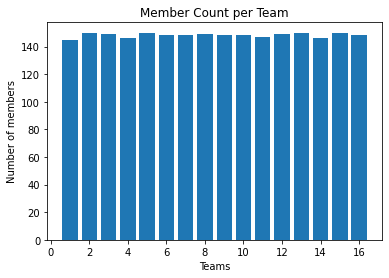

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

#convert column data into a list
teamID = noOfmembers['team_id'].values.tolist()
members = noOfmembers['No of Members'].values.tolist()
print(teamID)
print(members)

#creation histogram
fig, ax = plt.subplots()
hist = plt.bar(teamID, members)
ax.set_xlabel('Teams')
ax.set_ylabel('Number of members')
ax.set_title('Member Count per Team')

##### 1(d)

In [7]:
import pandas as pd
#importing state_transitions data frame
statetrans_df = pd.read_csv('data/state-transitions.csv')

#confirming data 
statetrans_df.head(10)

,id,task_id,state
0,773be55e02f9c76adad64a75b7625645,0,draft
1,1048aa1f3358cf0acde552d2025c0557,0,functional_spec
2,07aad16c459e268b8152756eb70c5e06,0,tech_spec
3,a46dbcbec2d52fb3638e388b093db39b,1,draft
4,13dc799760765b2a6600f5da7dfe9bce,1,functional_spec
5,2d1ad54bf710453a4b02e6ad434c46a9,2,draft
6,625412e9447f64079c687fe981c52c46,2,functional_spec
7,a9f7b7104ec93ee2c8e2e1228a00d3d0,2,tech_spec
8,dcdc7193887e3d341cc5f8098eb00bcf,2,implementation
9,536ccf9cd24dcea9032fd3f85375ec1b,3,draft


In [8]:
#extracting state from state_transitions dataframe
state = statetrans_df.loc[:,["task_id","state"]]

#convert task_id column into a list
task_id_list = state['task_id'].tolist()
task_id_list_str = [str(x) for x in task_id_list]

#convert state column into a list
state_list = state['state'].tolist()

#create empty lists
index_list = []
current_state = []

# reversing the list
task_id_list_str.reverse()

#total number of tasks
total_tasks = len(tasks_df['id'])

#for loop to find index of last occurence of task id
for id in range(total_tasks): 

    # finding the index of task id
    index = task_id_list_str.index(str(id))
    
    # finding the final occurenct index
    final_index = len(task_id_list_str) - index - 1
    
    #append to index_list
    index_list.append(final_index)

#for loop to find current states of each task 
for index in index_list:
    current_state.append(state_list[index])    


In [9]:
#creating a new copy of tasks dataframe
tasks_df2 = tasks_df.copy()

#adding state_transitions column to tasks dataframe
tasks_df2['state_transitions'] = current_state

tasks_df2

,id,description,assignee,sprint,team,story_points,state_transitions
0,0,Itself most affect rise after product tend eat...,114,1,8,13,tech_spec
1,1,Begin herself make Congress see eight possible...,31,6,10,5,functional_spec
2,2,Plan big themselves left public glass result o...,22,1,14,13,implementation
3,3,Finally table by establish begin maybe tough s...,58,1,8,2,implementation
4,4,Seem that although executive of energy chair p...,5,1,14,3,draft
...,...,...,...,...,...,...,...
9995,9995,Bad sometimes over thank nation notice perform...,100,6,3,13,done
9996,9996,Quickly through almost beat mention wife owner...,29,8,11,8,functional_spec
9997,9997,Affect nice car identify those change seem all...,27,5,5,5,implementation
9998,9998,Police skin painting discuss whose floor threa...,112,7,12,8,implementation


In [10]:
#convert data frame to csv
tasks_df2.to_csv('data/tasks_df2.csv')


##### 1(e)

In [11]:
def compute_commitment(team_id, sprint): 
    
    #Computing a dataframe to capture the commitments using groupby()
    sprint_team_grp = tasks_df2.groupby(['sprint', 'team'])
    commitment_df = sprint_team_grp['story_points'].sum().reset_index()
    
    #finding commitment using team_id and sprint
    row = commitment_df.loc[(commitment_df['team'] == team_id) & (commitment_df['sprint'] == sprint)]
    commitment = row.iloc[0]['story_points']
    
    return commitment

In [12]:
#Calling the function with (team_id=8, sprint=1) 

compute_commitment(8, 1)

350

##### 1(f)

In [13]:
def compute_velocity(team_id, sprint):
    #Computing a dataframe to capture the commitments using groupby()
    sprint_state_grp = tasks_df2.groupby(['sprint', 'team','state_transitions'])
    velocity_state_df = sprint_state_grp['story_points'].sum().reset_index()

    #finding commitment using team_id and sprint
    row = velocity_state_df.loc[(velocity_state_df['team'] == team_id) \
                                & (velocity_state_df['sprint'] == sprint) \
                                & (velocity_state_df['state_transitions'] == 'done')]
    velocity = row.iloc[0]['story_points']
    
    return velocity

In [14]:
#Calling the function with (team_id=8, sprint=1) 

compute_velocity(8, 1)

61

##### 1(g)

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [16]:
 def calculateCommitmentVelocity(team_id):   
    #retrieve unique sprintIds
    sprintId = tasks_df2['sprint'].unique() #returns an array
    #convert array into a list
    sprintId_list = sprintId.tolist()
    sprintId_list.sort()
    
    #create lists of velocity and commitment
    team_velocity = []
    team_commitment = []

    for id in sprintId_list:
        comm = compute_commitment(team_id,id)
        team_commitment.append(comm)
        vel = compute_velocity(team_id,id)
        team_velocity.append(vel)
    
    return sprintId_list, team_velocity, team_commitment

In [17]:
def visualize_velocity_commitment(team_id):
    
    sprintId_list, team_velocity, team_commitment = calculateCommitmentVelocity(team_id)
    X = sprintId_list
    Velocity = team_velocity
    Commitment = team_commitment

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, Commitment, 0.4, label = 'Commitment')
    plt.bar(X_axis + 0.2, Velocity, 0.4, label = 'Velocity')

    plt.xticks(X_axis, X)
    plt.xlabel("Sprints")
    plt.ylabel("Sum of Story Points")
    plt.title(f"Visualization of Velocity and Commitment of Team ID: {team_id}")
    plt.legend(bbox_to_anchor=(1, 0.5))
    plt.show()

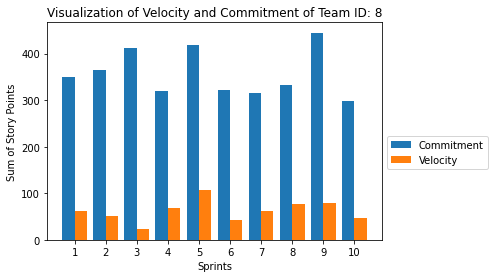

In [18]:
#Calling the function with (team_id=8) 

visualize_velocity_commitment(8)

### Question 2

##### 2(a)

In [19]:
#create an SQLite database
import sqlite3
conn = sqlite3.connect('tasks.db')
cur = conn.cursor()
cur.execute('DROP TABLE IF EXISTS tasks')
cur.execute('CREATE TABLE tasks (task_id INTEGER PRIMARY KEY, description TEXT, assignee INTEGER, \
sprint INTEGER, team INTEGER, story_points INTEGER , state_transitions TEXT)')
conn.commit()

import csv
with open('data/tasks_df2.csv') as f:
    reader = csv.reader(f)
    # Ignore the header
    next(reader, None)
    read_count = 0
    for row in reader:
        read_count += 1
        task_id = row[1]
        description = row[2]
        assignee = row[3]
        sprint = row[4]
        team = row[5]
        story_points = row[6]
        state_transitions = row[7]
        cur.execute('INSERT INTO tasks (task_id, description, assignee, sprint, team, story_points, state_transitions) VALUES (?, ?, ?, ?, ?, ?, ?)', \
                    (task_id, description, assignee, sprint, team, story_points, state_transitions))
    conn.commit()
    
    cur.execute('SELECT COUNT(*) FROM tasks')
    row_count = cur.fetchone()[0]
    assert row_count == read_count
    
conn.close()

In [20]:
#Use sqlalchemy ORM to define and store data
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Enum, Float, ForeignKey
from sqlalchemy.orm import relationship

Base = declarative_base()

#define tasks table
class Tasks(Base):
    __tablename__ = 'Tasks'
    task_id = Column(Integer, primary_key = True)
    description = Column(String)
    assignee = Column(Integer)
    sprint = Column(Integer)
    team = Column(Integer)
    story_points = Column(Integer)
    state_transitions = Column(String)

    
    def __repr__(self):
        return "%s %s %s %s %s %s %s" %(self.task_id, self.description, self.assignee, \
                        self.sprint, self.team, self.story_points, self.state_transitions)


In [21]:
#create our database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///tasks.db', echo=False)
Base.metadata.create_all(engine)

In [22]:
from sqlalchemy import create_engine

#establishing a connection with the database
engine = create_engine('sqlite:///tasks.db', echo=False)


#create an instance of the session to start interacting with the database
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()

In [23]:
#verification
#result = session.query(Tasks)
#for r in result:
#    print (r)

##### 2(b)

In [24]:
#function to get all unique sprint IDs
def get_sprint_list(team_id):
    result = session.query(Tasks) \
        .filter(Tasks.team == team_id,)
    sprint_list = []
    for r in result:
        if r.sprint not in sprint_list:
            sprint_list.append(r.sprint)
    return sprint_list

#funtion to get total storypoints of each sprint ID per current state
def calculate_total_storypoints(team_id, sprint):
        result = session.query(Tasks) \
            .filter(Tasks.team == team_id, Tasks.sprint == sprint)
        
        #calculate total story points per current state
        total_draft = 0 
        total_functional_spec = 0
        total_tech_spec = 0
        total_implementation = 0
        total_done = 0
        for r in result:
            if r.state_transitions == 'draft':
                total_draft += r.story_points
            elif r.state_transitions == 'functional_spec':
                total_functional_spec += r.story_points
            elif r.state_transitions == 'tech_spec':
                total_tech_spec += r.story_points
            elif r.state_transitions == 'implementation':
                total_implementation += r.story_points
            else:
                total_done += r.story_points
        
        return total_draft, total_functional_spec, total_tech_spec, total_implementation, total_done

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def visualize_story_points_by_state(team_id):
    
    #get list of sprint IDs
    sprint_list = get_sprint_list(team_id)
    sprint_list.sort()
    
    #create lists for all states of sprints
    draft_list = []
    functional_spec_list = []
    tech_spec_list = []
    implementation_list = []
    done_list = []
    
    for s in sprint_list:
        total_draft, total_functional_spec, total_tech_spec, total_implementation, total_done = calculate_total_storypoints(team_id, s)
        draft_list.append(total_draft)
        functional_spec_list.append(total_functional_spec)
        tech_spec_list.append(total_tech_spec)
        implementation_list.append(total_implementation)
        done_list.append(total_done)
    
    #plotting graph
    labels = sprint_list     #labels on x axis
    draft = np.array(draft_list)
    functional_spec = np.array(functional_spec_list)
    tech_spec = np.array(tech_spec_list)
    implementation = np.array(implementation_list)
    done = np.array(done_list)
    width = 0.5       # the width of the bars

    fig, ax = plt.subplots()
    
    ax.bar(labels, draft, width, label='draft')
    ax.bar(labels, functional_spec, width, bottom=draft, label='functional_spec')
    ax.bar(labels, tech_spec, width, bottom=draft + functional_spec, label='tech_spec')
    ax.bar(labels, implementation, width, bottom=draft + functional_spec + tech_spec, label='implementation')
    ax.bar(labels, done, width, bottom=draft + functional_spec + tech_spec + implementation, label='done')
    
    ax.set_xlabel('Sprint')
    ax.set_ylabel('Story points')
    ax.set_title('Visualization of Storypoints by State')
    ax.legend(bbox_to_anchor=(1, 0.5))

    plt.show()  
   
    return ax

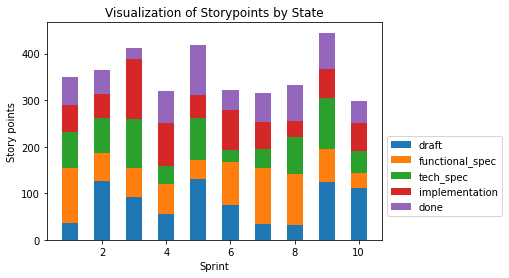

<AxesSubplot:title={'center':'Visualization of Storypoints by State'}, xlabel='Sprint', ylabel='Story points'>

In [26]:
#Calling the function with (team_id=8) 
visualize_story_points_by_state(8)

##### 2(c)(i)
Note: I have changed the function name slightly to differentiate SQL language used and to test if the function actually works.

In [27]:
#sqlalchemy ORM
def compute_commitment_ORM(team_id, sprint):
        result = session.query(Tasks) \
            .filter(Tasks.team == team_id, Tasks.sprint == sprint)
        total_commitment = 0 
        for r in result:
            total_commitment += r.story_points
        return total_commitment

In [28]:
#Calling the function with (team_id=8, sprint=1)
compute_commitment_ORM(8, 1)

350

##### 2(c)(ii)
Note: I have changed the function name slightly to differentiate SQL language used and to test if the function actually works.

In [29]:
#sqlalchemy ORM
def compute_velocity_ORM(team_id, sprint):
    result = session.query(Tasks) \
           .filter(Tasks.team == team_id, Tasks.sprint == sprint, Tasks.state_transitions == "done")
    total_velocity = 0 
    for r in result:
        total_velocity += r.story_points
    return total_velocity

In [30]:
#Calling the function with (team_id=8, sprint=1)
compute_velocity_ORM(8, 1)

61

##### 2(d)(i)
Note: I have changed the function name slightly to differentiate SQL language used and to test if the function actually works.

In [31]:
#SQLite3 with SQL statements
def compute_commitment_SQL(team_id, sprint):
    conn = sqlite3.connect('tasks.db')
    cur = conn.cursor()
    cur.execute('SELECT team, sprint, story_points FROM tasks WHERE team = ? and sprint = ?',
               (team_id, sprint))
    
    total_commitment = 0 
    for r in cur:
        total_commitment += r[2] #r is a tuple, access story_points by index [2]
    
    return total_commitment

In [32]:
#Calling the function with (team_id=8, sprint=1)
compute_commitment_SQL(8, 1)

350

##### 2(d)(ii)
Note: I have changed the function name slightly to differentiate SQL language used and to test if the function actually works.

In [33]:
#SQLite3 with SQL statements
def compute_velocity_SQL(team_id, sprint):
    conn = sqlite3.connect('tasks.db')
    cur = conn.cursor()
    cur.execute('SELECT team, sprint, state_transitions, story_points FROM tasks WHERE team = ? and sprint = ? and state_transitions = ?',
               (team_id, sprint, 'done'))
    
    total_velocity = 0 
    for r in cur:
        total_velocity += r[3] #r is a tuple, access story_points by index [3]
    
    return total_velocity

In [34]:
#Calling the function with (team_id=8, sprint=1)
compute_velocity_SQL(8, 1)

61

##### 2(e)(i)
Note: I have changed the function name slightly to differentiate SQL language used and to test if the function actually works.

In [35]:
#sqlalchemy ORM
def who_done_the_least_ORM(team_id):
    
    #get all unique user IDs in a list
    result = session.query(Tasks).filter(Tasks.team == team_id)
    userID_list = []
    for r in result:
        if r.assignee not in userID_list:
            userID_list.append(r.assignee)
    userID_list.sort() #sort the userID_list in ascending order
    
    #get done story points of each userID in the team
    done_dict = {}
    for userID in userID_list:
        result2 = session.query(Tasks) \
            .filter(Tasks.team == team_id, Tasks.assignee == userID, Tasks.state_transitions == "done")
        
        #find the total done story point of each UserID
        total_done = 0
        for r in result2:
            total_done += r.story_points

        if total_done != 0: #remove User IDs that do not have any done story points
            done_dict[userID] = total_done
    
    #get user IDs who have the least number of done story points in the team
    who_done_the_least = []
    min_done_storypoints = min(done_dict.values()) #find the minimum done storypoints
    for userID, done_points in done_dict.items():
        if done_points == min_done_storypoints:
            who_done_the_least.append(str(userID))
            
    text = "User IDs that have the least done story points: " + ", ".join(who_done_the_least)
            
    return text

In [36]:
#Calling the function with (team_id=8)
who_done_the_least_ORM(8)

'User IDs that have the least done story points: 23, 28, 129, 136'

##### 2(e)(ii)
Note: I have changed the function name slightly to differentiate SQL language used and to test if the function actually works.

In [37]:
#SQLite3 with SQL statements
def who_done_the_least_SQL(team_id):
    
    conn = sqlite3.connect('tasks.db')
    cur = conn.cursor()
    
    #get all unique user IDs in a list
    cur.execute('SELECT * FROM tasks WHERE team = ?',(team_id,))
    userID_list = []
    for r in cur:
        if r[2] not in userID_list: #r[2] is the userID
            userID_list.append(r[2]) 
    userID_list.sort() #sort the userID_list in ascending order
    
    #get done story points of each userID in the team
    done_dict = {}
    for userID in userID_list:
        cur.execute('SELECT team, assignee, state_transitions, story_points FROM tasks WHERE team = ? and assignee = ? and state_transitions = ?',
               (team_id, userID, 'done'))

        #find the total done story point of each UserID
        total_done = 0
        for r in cur:
            total_done += r[3] #r[3] is the done story points
             
        if total_done != 0: #remove User IDs that do not have any done story points
            done_dict[userID] = total_done
        
   #get user IDs who have the least number of done story points in the team
    who_done_the_least = []
    min_done_storypoints = min(done_dict.values()) #find the minimum storypoints
    for userID, done_points in done_dict.items():
        if done_points == min_done_storypoints:
            who_done_the_least.append(str(userID))
            
    text = "User IDs that have the least done story points: " + ", ".join(who_done_the_least)
            
    return text           

In [38]:
#Calling the function with (team_id=8)
who_done_the_least_SQL(8)

'User IDs that have the least done story points: 23, 28, 129, 136'